In [21]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
cd ..

/home/anindya/Documents/MachineLearning/YogaGNN


In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [4]:
path = os.getcwd()

In [5]:
image_path = os.path.join(path, "DATASET/TRAIN/goddess")

In [6]:
IMAGE_LIST = os.listdir(image_path)

In [7]:
IMAGES = IMAGE_LIST[:10]

In [8]:
ANNOTATED_IMAGES = []

with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=False,
    min_detection_confidence=0.5) as pose:
    for img in IMAGES:
        image_pth = os.path.join(image_path, img)
        image = cv2.imread(image_pth)
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if not results.pose_landmarks:
            continue
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        ANNOTATED_IMAGES.append(annotated_image)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


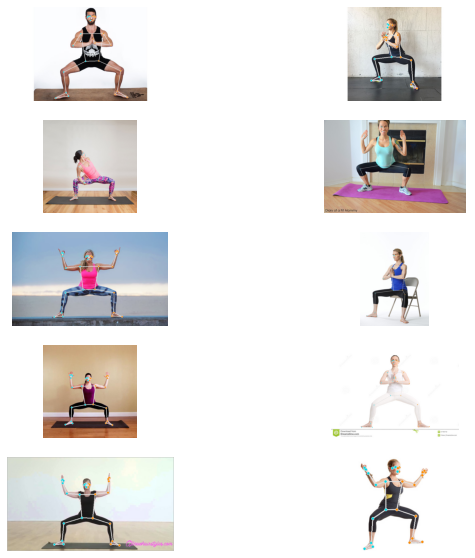

In [9]:
fig = plt.figure(figsize=(10, 10))
columns = 2
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.cvtColor(ANNOTATED_IMAGES[i-1], cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
plt.show()

In [10]:
pose_connections = mp_pose.POSE_CONNECTIONS

In [12]:
source_index = []
target_index = []

for i, j in list(pose_connections):
    source_index.append(i)
    target_index.append(j)

edge_index = np.array([
    source_index,
    target_index
])

In [13]:
edge_index

array([[15, 16, 18,  3, 14, 23, 28, 11, 27,  6, 15, 24, 16,  4,  5, 29,
        12, 23,  0,  9,  1,  0, 11, 30, 28, 15, 16, 25, 26, 12, 17,  2,
        11, 27, 13],
       [21, 20, 20,  7, 16, 25, 30, 23, 31,  8, 17, 26, 22,  5,  6, 31,
        24, 24,  1, 10,  2,  4, 13, 32, 32, 19, 18, 27, 28, 14, 19,  3,
        12, 29, 15]])

In [17]:
pose_indices = [
    (0, 1),
    (0, 6),
    (0, 2),
    
    (1, 3),
    (1, 7),
    (1, 0),
    
    (2, 4),
    (2, 0),
    
    (3, 5),
    (3, 1),
    
    (4, 2),
    (5, 3),
    
    (6, 0),
    (6, 7),
    (6, 8),
    
    (7, 1),
    (7, 6),
    (7, 9),
    
    (8, 6),
    (8, 10),
    
    (9, 7),
    (9, 11),
    
    (10, 8),
    (10, 12),
    
    (11, 9),
    (11, 13),
    
    (12, 10),
    (13, 11)
]

In [36]:
source_indices = []
target_indices = []

for pos in pose_indices:
    source_indices.append(pos[0])
    target_indices.append(pos[1])

edge_indices = np.array([
    source_indices,
    target_indices
], dtype=np.float32)

In [37]:
edge_index = torch.tensor(edge_indices, dtype=torch.long)

In [38]:
from torch_geometric.utils import add_self_loops

In [39]:
self_looped_edge_index = add_self_loops(edge_index)[0]

In [40]:
def plot_graph(coo_indices):
    source = coo_indices[0]
    target = coo_indices[1]
    g = nx.Graph()
    for i, j in zip(source, target):
        s, t = i.item(), j.item()
        g.add_edge(s, t)
    return g

In [41]:
import networkx as nx

In [42]:
g = plot_graph(self_looped_edge_index)

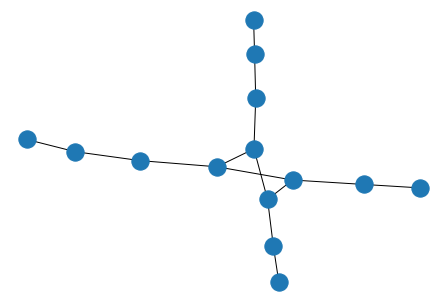

In [43]:
nx.draw(g)